In [3]:
import torch
from torch import nn, optim                             
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

In [4]:
torch.manual_seed(0)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# SD of all pixels should be 1
# 0.5, 0.5, 0.5 -- RGB
# first set of 0.5 0.5 0.5 represents the means of each channel
# second set of 0.5 0.5 0.5 represents the SDs of each channel
# for each pixel value, subtract from it 0.5 (mean; need to get the mean from the training examples) and divide it by 0.5 (dividing so that when we compute the SD, it's going to give us 1)
# the transform function automatically does it, vals between -1 and 1, SD = 1

trainset = datasets.CIFAR10(
    root = '~/Downloads/',
    train = True,
    download = True,
    transform = transform 
)
testset = datasets.MNIST(
    root = '~/Downloads/',
    train = False,
    download = True,
    transform = transform 
)

batchSize = 64
train_dataloader = DataLoader(trainset, batch_size = batchSize, shuffle = True)
test_dataloader = DataLoader(testset, batch_size = 8, shuffle = True)

100%|██████████| 170498071/170498071 [18:56<00:00, 150013.28it/s]


Extracting C:\Users\user/Downloads/cifar-10-python.tar.gz to C:\Users\user/Downloads/


In [8]:
trainset[0]             # returns X (image) and Y (label)
trainset[0][0]          # image is contained at index 0
trainset.classes        # returns a list of all classes
trainset[0][0].shape    # size of the image is 3 x 32 x 32 (in PyTorch, depth is first), but you need to reshape if you want to view it using plt
                        # instead of all this, we'll use a transformation, normalize it but with -1 instead of the mean and 2 for SD
                        # this will give us back the original image (see next cell)

torch.Size([3, 32, 32])

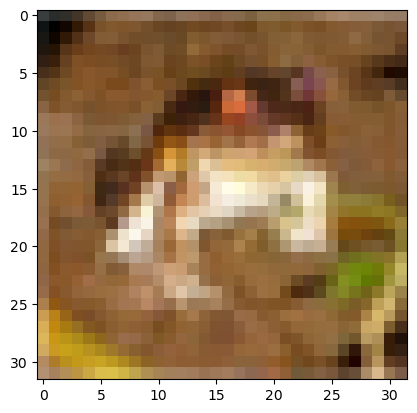

In [15]:
transform_back = transforms.Compose([transforms.Normalize((-1.,-1.,-1.),(2.,2.,2.)), transforms.ToPILImage()])
# PIL takes care of changing the shape and the visualization

plt.imshow(transform_back(trainset[0][0]))